# 9.6.2 Support Vector Machine

In [1]:
library(e1071)

In order to fit an SVM using a non-linear kernel, we once again use the `svm()` function. However, now we use a different value of the parameter `kernel`.

To fit an SVM with a polynomial kernel we use `kernel = "polynomial"`, and to fit an SVM with a radial kernel we use `kernel = "radial"`. In the former case we also use the `degree` arguement to specify a degree for the polynomial kernel (this is $d$ in (9.22), and in the latter case we use `gamma` to specify a value of $\gamma$ for the radial basis kernel (9.24).

In [2]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100,] <- x[1:100,] + 2
x[101:150,] <- x[101:150,] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))

Plotting the data makes it clear that the class boundary is indeed non-linear:

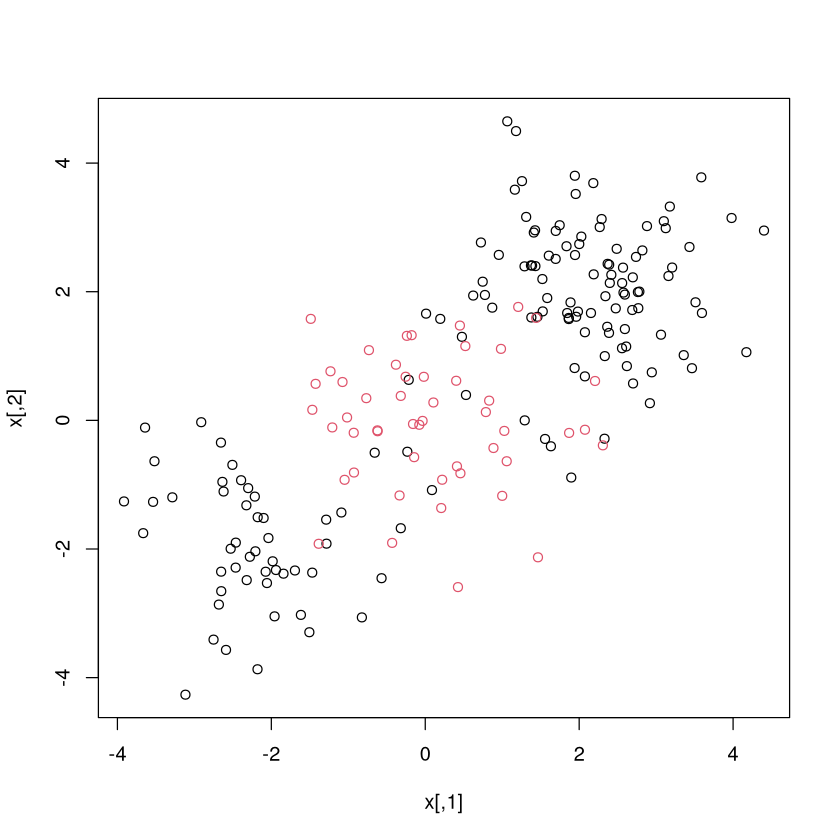

In [3]:
plot(x, col=y)

The data is randomly split into training and testing groups. We then fit the training data using the `svm()` funciton with a radial kernel and $\gamma = 1$:

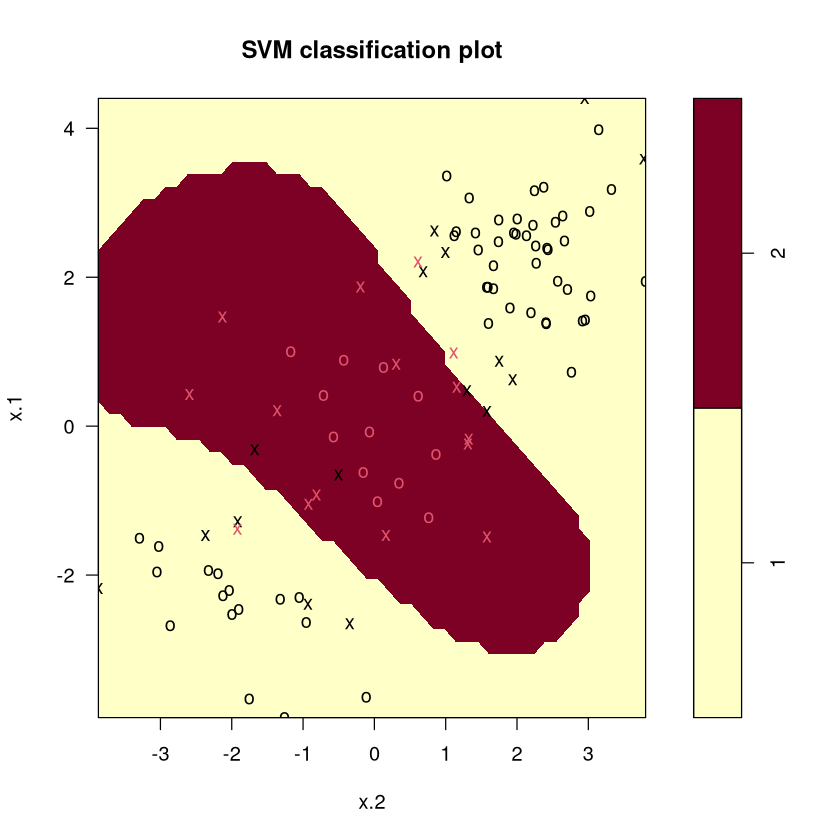

In [4]:
train <- sample(200, 100)
svmfit <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 1, cost = 1)
plot(svmfit, dat[train,])

The plot shows that the resulting SVM has a decidely non-linear boundary. The `summary()` function can be used to obtain some information about the SVM fit:

In [5]:
summary(svmfit)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




We can see from the figure that there are a fair number of training errors in this SVM fit. If we increase the value of `cost`, we can reduce the number of training errors. However, this comes at the price of a more irregular decision boundary that seems to risk of overfitting the data.

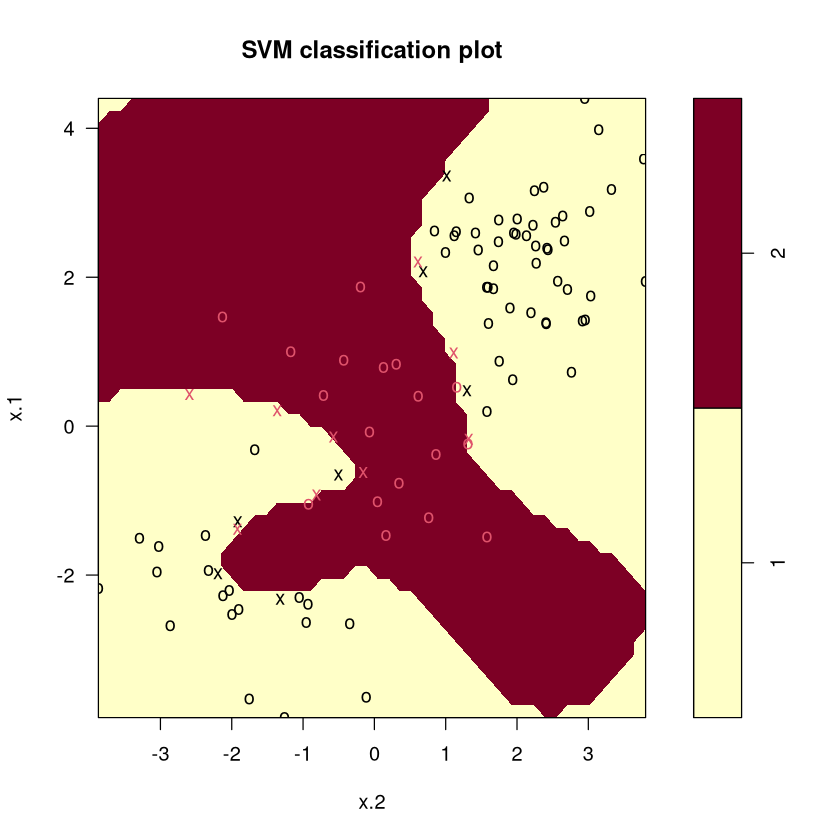

In [6]:
svmfit <- svm(y ~ ., data = dat[train,], kernel = "radial", gamma = 1, cost = 1e5)
plot(svmfit, dat[train,])

We can perform cross-validation using `tune()` to select the best choice of $\gamma$ and `cost` for an SVM with a radial kernel:

In [7]:
set.seed(1)
tune.out <- tune(svm, y ~ ., data = dat[train,], kernel = "radial", ranges = list(
    cost = c(0.1, 1, 10, 100, 1000),
    gamma = c(0.5, 1, 2, 3, 4)
    ))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

Therefore, the best choice of parameters involves `cost = 1` and `gamma = 0.5`. We can view the test set predictions for this model by appying the `predict()` function to the data. Notice that to do this we subset the dataframe `dat` using `-train` as an index set.

In [8]:
table(
    true = dat[-train, "y"],
    pred = predict(
        tune.out$best.model, newdata = dat[-train,]
        ))

    pred
true  1  2
   1 67 10
   2  2 21

$12\%$ of test observations are misclassified by this SVM.